### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Regression analyses
#### Bonus: performance improvement after removing outliers

### 1. Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

### 2. Importing Data

In [5]:
# Project folder path
path=r'/Users/sukihabibe/Desktop/CareerFoundry/Portofolio_A6/World_Happiness_Report'

In [6]:
# Importing data

df=pd.read_csv(os.path.join(path, '02_Data', 'Prepared', 'df_all3.csv'))

In [7]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Year,Country,Region,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Happiness-range
0,0,0,2019,Finland,Western Europe,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,High score
1,1,1,2019,Denmark,Western Europe,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,High score
2,2,2,2019,Norway,Western Europe,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341,High score
3,3,3,2019,Iceland,Western Europe,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118,High score
4,4,4,2019,Netherlands,Western Europe,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298,High score


In [8]:
# Drop 'Unnamed:0' & Unnamed:0.1

df=df.drop("Unnamed: 0",axis=1)

df=df.drop("Unnamed: 0.1",axis=1)

In [9]:
df.head()

,Year,Country,Region,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Happiness-range
0,2019,Finland,Western Europe,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,High score
1,2019,Denmark,Western Europe,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,High score
2,2019,Norway,Western Europe,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341,High score
3,2019,Iceland,Western Europe,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118,High score
4,2019,Netherlands,Western Europe,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298,High score


### 3. Regression Analyses

### GDP: Hypothesis: High scores of GDP results in High Happiness scores

### Data prep for regression analysis

/Users/sukihabibe/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GDP per capita', ylabel='Density'>

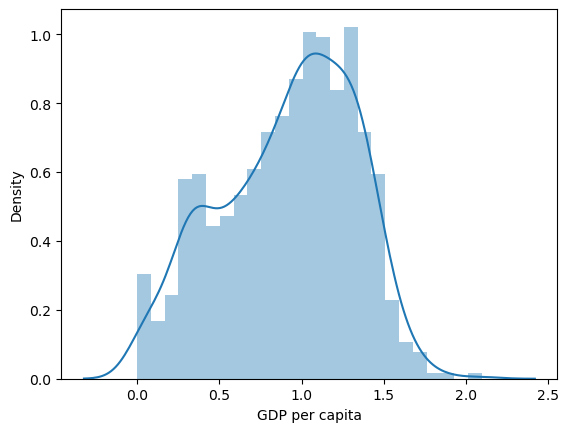

In [10]:
sns.distplot(df['GDP per capita'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [11]:
df['GDP per capita'].mean() # Check the mean

0.916047482482971

In [12]:
df['GDP per capita'].median() # Check the median

0.9822047088146211

In [13]:
df['GDP per capita'].max() # Check the max

2.096

In [28]:
df['GDP per capita'].min() # Check the min

0.0

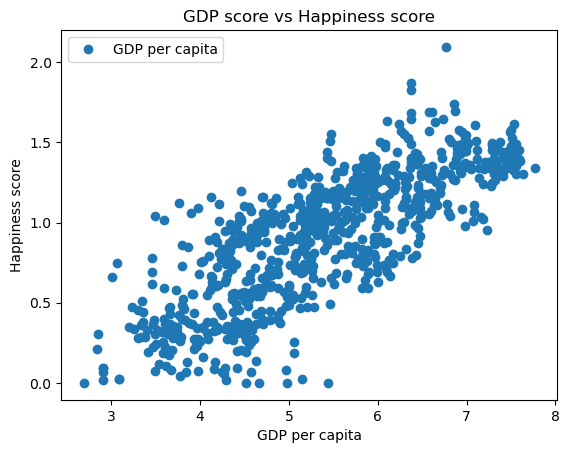

In [15]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Happiness score', y='GDP per capita',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('GDP score vs Happiness score')  
plt.xlabel('GDP per capita')  
plt.ylabel('Happiness score')    ## It looks like the higher the score for GDP per capita the higher the happiness score.
plt.show()

In [17]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df['GDP per capita'].values.reshape(-1,1)  
y = df['Happiness score'].values.reshape(-1,1)  

In [18]:
X

array([[1.34      ],
       [1.383     ],
       [1.488     ],
       [1.38      ],
       [1.396     ],
       [1.452     ],
       [1.387     ],
       [1.303     ],
       [1.365     ],
       [1.376     ],
       [1.372     ],
       [1.034     ],
       [1.276     ],
       [1.609     ],
       [1.333     ],
       [1.499     ],
       [1.373     ],
       [1.356     ],
       [1.433     ],
       [1.269     ],
       [1.503     ],
       [1.3       ],
       [1.07      ],
       [1.324     ],
       [1.368     ],
       [1.159     ],
       [0.8       ],
       [1.403     ],
       [1.684     ],
       [1.286     ],
       [1.149     ],
       [1.004     ],
       [1.124     ],
       [1.572     ],
       [0.794     ],
       [1.294     ],
       [1.362     ],
       [1.246     ],
       [1.231     ],
       [1.206     ],
       [0.745     ],
       [1.238     ],
       [0.985     ],
       [1.258     ],
       [0.694     ],
       [0.882     ],
       [1.092     ],
       [1.162

In [19]:
y

array([[7.769     ],
       [7.6       ],
       [7.554     ],
       [7.494     ],
       [7.488     ],
       [7.48      ],
       [7.343     ],
       [7.307     ],
       [7.278     ],
       [7.246     ],
       [7.228     ],
       [7.167     ],
       [7.139     ],
       [7.09      ],
       [7.054     ],
       [7.021     ],
       [6.985     ],
       [6.923     ],
       [6.892     ],
       [6.852     ],
       [6.825     ],
       [6.726     ],
       [6.595     ],
       [6.592     ],
       [6.446     ],
       [6.444     ],
       [6.436     ],
       [6.375     ],
       [6.374     ],
       [6.354     ],
       [6.321     ],
       [6.3       ],
       [6.293     ],
       [6.262     ],
       [6.253     ],
       [6.223     ],
       [6.199     ],
       [6.198     ],
       [6.192     ],
       [6.182     ],
       [6.174     ],
       [6.149     ],
       [6.125     ],
       [6.118     ],
       [6.105     ],
       [6.1       ],
       [6.086     ],
       [6.07 

In [20]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Regression Analysis

In [21]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [22]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [24]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

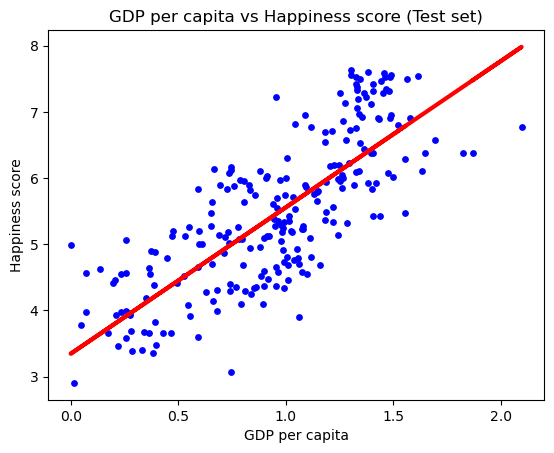

In [38]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('GDP per capita vs Happiness score (Test set)')
plot_test.xlabel('GDP per capita')  # independent value
plot_test.ylabel('Happiness score')  # dependent value
plot_test.show()

In [26]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [27]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)     ## positive relationship. As X rises, so does y at a degree of 2.21137..
print('Mean squared error: ', rmse)   ## MSE of 0.52473... sounds reasonable considering the range of X values.
print('R2 score: ', r2)               ## R2 indicates that 58% of the time the model works. This seems moderate.

Slope: [[2.21137041]]
Mean squared error:  0.5247344802639003
R2 score:  0.5875303710739626


In [31]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,5.472,6.776867
1,6.778,5.811394
2,6.098,6.276475
3,7.054,6.293296
4,3.663,4.154901
5,4.574,5.478261
6,4.297,4.986155
7,4.982,3.345539
8,6.774,7.980572
9,5.430,6.452515


In [32]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [33]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [34]:
print('Slope:' ,regression.coef_)    ## about the same
print('Mean squared error: ', rmse)  ## a little bit better, relatively small differnce
print('R2 score: ', r2)              ## also a little bit better , relatively small differnce

Slope: [[2.21137041]]
Mean squared error:  0.45911100157469337
R2 score:  0.636213641788469


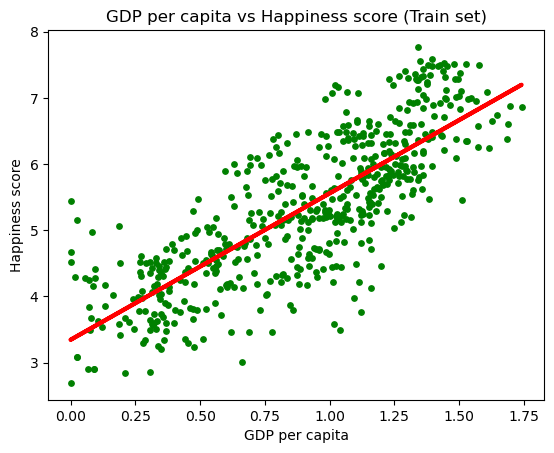

In [37]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('GDP per capita vs Happiness score (Train set)')
plot_test.xlabel('GDP per capita')
plot_test.ylabel('Happiness score')
plot_test.show()

#### The model is not a perfect fit, but we can conclude that eventhough it can't accuratly predict the happiness score it is a good indicator.

#### Possibly a combination of factors that will more accurately predict the happiness score.